## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명 : 모델 성능 평가
- 평가일 : 03.13
- 성명 : 정현우
- 점수 : 60

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용


In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)



[2 0 2 2 0 1 1 0 2 2 1 1 2 1 2 1 0 2 1 1 2 0 0 1 0 2 1 0 1 1]
[1 0 2 2 0 1 1 0 2 2 1 1 2 1 2 1 0 2 1 1 2 0 0 1 0 2 1 0 1 1]


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
con=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)
print('오차행렬\n',con)
print('정확도 :',acc)

오차행렬
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
정확도 : 0.9666666666666667


Q2. 타이타닉 분석용 데이터세트인 tdf1.pkl를 불러와서 생존자 예측 모델을 만든 후 오차행렬, 정확도, 재현율, f1, AUC를 포함하는 사용자 함수를 활용하여 평가하세요.
- test_size = 0.2, 분류기는 RandomForestClassifier 이용

In [25]:
import pandas as pd
df=pd.read_pickle('dataset7/tdf1.pkl')
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
def est(y_test,pred,pred_proba):
    con=confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    roc=roc_auc_score(y_test,pred_proba)
    print('오차행렬\n',con)
    print('정확도 :',acc)
    print('정밀도 :',pre)
    print('재현율 :',rec)
    print('f1점수:',f1)
    print('roc_auc :',roc)


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[91 12]
 [22 54]]
정확도 : 0.8100558659217877
정밀도 : 0.8181818181818182
재현율 : 0.7105263157894737
f1점수: 0.7605633802816901
roc_auc : 0.8502810424118549


Q3. Q2에서 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(rf_clf,X, y,cv=5)
scores.mean()

0.7923733601154981

Q4. Q2에서 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

In [35]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10,50,100],
           'max_depth' : [4,6, 8, 10],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
grid_cv = GridSearchCV(rf_clf, param_grid = params,cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8160


Q5 ~ Q7. 'dataset/diabetes.csv'을 불러와서 아래사항을 수행하세요.
- 피마 인디언 당뇨병 예측을 로지스틱 회귀를 이용하여 수행하고 사용자 함수를 작성하여 평가(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)
- 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 시각화 
- 재현율 기준의 성능을 개선하기 위하여 그 값이 0이 될 수 없는 각 칼럼을 탐색하여 적절한 처리를 한 후 로지스틱 회귀로 예측 및 평가 수행(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)


In [40]:
df=pd.read_csv('dataset7/diabetes.csv')
df
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [43]:
from sklearn.linear_model import LogisticRegression
import numpy as np

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
pred_proba=lr_clf.predict_proba(X_test)[:,1]
est(y_test,pred,pred_proba)

오차행렬
 [[92 11]
 [20 56]]
정확도 : 0.8268156424581006
정밀도 : 0.835820895522388
재현율 : 0.7368421052631579
f1점수: 0.7832167832167832
roc_auc : 0.8618421052631579


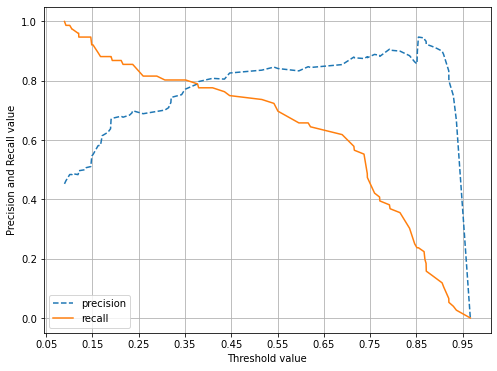

In [52]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):

    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    # print(thresholds.shape[0]) 141
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])


Q8. "dataset/auto-mpg.xlsx"을 불러와서 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [76]:
df=pd.read_excel('dataset7/auto-mpg.xlsx')
df
X=df.drop(['mpg','car name'],axis=1)
y=df.mpg
X = X.replace('?',0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse: {rmse}, r2_score: {r_square}')

mse: 8.936269256500841, rmse: 2.9893593388050292, r2_score: 0.8295017469933683


Q9. 'load_boston' 을 불러와서 cross_val_score를 이용한 cv=5인 교차검증을 수행 후 MSE, RMSE를 출력하세요.(LineaRegression) 

In [91]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
X=df
y=boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y

C:\Users\hyeonu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [94]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
scores = cross_val_score(lr,X, y,cv=5)
scores.mean()

0.35327592439588124

Q10. 'Q9에 대하여 R2 Score를 구하세요.(k=5) 

In [95]:
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse}, rmse: {rmse}, r2_score: {r_square}')

mse: 21.419850553362473, rmse: 4.62815844082314, r2_score: 0.7111949313279893
